In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # additional plotting functionality
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# plt.style.use('dark_background')
import shutil
from keras.models import Sequential
from keras.models import *
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import BatchNormalization
from keras.layers import *
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
import os
from tensorflow.keras.applications.densenet import DenseNet121
from keras import losses 
from keras import optimizers 
from keras import metrics 


print(os.listdir("/content/drive/MyDrive/TRAIN_TEST_VAILD"))

['VALID', 'TEST', 'TRAIN']


In [ ]:
#xray_data = pd.read_csv('../content/drive/MyDrive/Datasets/img_csv_dataset/total1.csv')
#num_obs = len(xray_data)
#print('Number of observations:',num_obs)
#xray_data.head(5) 

Number of observations: 96


,Image_Index,Finding_Labels,Follow_up,Patient_ID,Patient_Age,Patient_Gender,View_Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [ ]:
train_path = '/content/drive/MyDrive/TRIAN_TEST_VAILD/TRAIN'

In [ ]:
val_path = '/content/drive/MyDrive/TRIAN_TEST_VAILD/VALIDATION'

In [ ]:
import random

# file_path = '/content/drive/MyDrive/Datasets/NIH_Sample_dataset/images'
# target_path = '/content/drive/MyDrive/Datasets/TRIAN_TEST_VAILD/TRAIN'
# image_names = os.listdir(file_path)
# random.shuffle(image_names)
# for i in range(100):
#     image_name = image_names[i]
#     image_path = os.path.join(file_path,image_name)
#     tcp = os.path.join(target_path,image_name)
#     shutil.copy2(image_path,tcp)

In [ ]:
# cnt = 0
# target_dir = '/content/drive/MyDrive/Datasets/TRIAN_TEST_VAILD/Train'
# ip1 = '/content/drive/MyDrive/Datasets/IMG_FOLDERS/Emphysema'
# image_names = os.listdir(ip1)

# # image_names = os.listdir(image_names)
# for filename in image_names:
#   # if row['Finding_Labels']== 'Emphysema' and row['View_Position']== 'PA':
#     filename= row['Image_Index']
#     ip = os.path.join(ip1,filename)
#     tcp = os.path.join(target_dir,filename)
#     shutil.copy2(ip,tcp)
#     cnt += 1

# print(cnt)



CNN Based model in keras

In [ ]:
model = Sequential()
model.add(DenseNet121(weights='imagenet', include_top=False, pooling= "avg"))
model.add(Flatten())
model.add(Dense(14, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

29097984/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 14)                14350     
                                                                 
 flatten_1 (Flatten)         (None, 14)                0         
                                                                 
Total params: 7,051,854
Trainable params: 6,968,206
Non-trainable params: 83,648
_________________________________________________________________


Training phase

In [ ]:
train_data_gen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
test_data_set = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
valid_data_set = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/TRAIN_TEST_VAILD/TRAIN',
    target_size = (224,224),
    batch_size = 16,
    class_mode = "categorical"
)

Found 2533 images belonging to 14 classes.


In [ ]:
valid_generator = valid_data_set.flow_from_directory(
    '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID',
    target_size = (224,224),
    batch_size = 16,
    class_mode = "categorical"
)

Found 210 images belonging to 14 classes.


In [ ]:
train_generator.class_indices

{'Atelectasis': 0,
 'Cardiomegaly': 1,
 'Consolidation': 2,
 'Edema': 3,
 'Effusion': 4,
 'Emphysema': 5,
 'Fibrosis': 6,
 'Hernia': 7,
 'Infiltration': 8,
 'Mass': 9,
 'Nodule': 10,
 'Pleural_Thickening': 11,
 'Pneumonia': 12,
 'Pneumothorax': 13}

In [ ]:
test_generator = test_data_set.flow_from_directory(
    '/content/drive/MyDrive/TRAIN_TEST_VAILD/TEST',
    target_size = (224,224),
    batch_size = 16,
    class_mode = "categorical"
)
print(valid_generator)

Found 162 images belonging to 14 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 150,
    validation_data = valid_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/150
8/8 [==============================] - 119s 14s/step - loss: 0.4614 - accuracy: 0.0703 - val_loss: 1.2129 - val_accuracy: 0.0000e+00
Epoch 2/150
8/8 [==============================] - 104s 13s/step - loss: 0.2829 - accuracy: 0.0859 - val_loss: 2.0981 - val_accuracy: 0.0625
Epoch 3/150
8/8 [==============================] - 102s 12s/step - loss: 0.2885 - accuracy: 0.1016 - val_loss: 2.0976 - val_accuracy: 0.1562
Epoch 4/150
8/8 [==============================] - 101s 12s/step - loss: 0.2725 - accuracy: 0.1094 - val_loss: 2.6035 - val_accuracy: 0.0000e+00
Epoch 5/150
8/8 [==============================] - 99s 12s/step - loss: 0.2607 - accuracy: 0.1328 - val_loss: 3.6509 - val_accuracy: 0.0625
Epoch 6/150
8/8 [==============================] - 99s 12s/step - loss: 0.2623 - accuracy: 0.0938 - val_loss: 3.2712 - val_accuracy: 0.0938
Epoch 7/150
8/8 [==============================] - 100s 12s/step - loss: 0.2571 - accuracy: 0.1484 - val_loss: 4.5912 - val_accuracy: 0.1250
Epoch 8

KeyboardInterrupt: ignored

In [ ]:
model.save('model_adv.h5')

In [ ]:
# model.evaluate_generator(train_generator)

In [ ]:
# model.evaluate_generator(valid_generator)

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
train_generator.class_indices

{'Atelectasis': 0,
 'Cardiomegaly': 1,
 'Consolidation': 2,
 'Edema': 3,
 'Effusion': 4,
 'Emphysema': 5,
 'Fibrosis': 6,
 'Hernia': 7,
 'Infiltration': 8,
 'Mass': 9,
 'Nodule': 10,
 'Pleural_Thickening': 11,
 'Pneumonia': 12,
 'Pneumothorax': 13}

In [ ]:
y_actual = []
y_test = []

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Atelectasis/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Atelectasis/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(0)
  # # maxprob = max(p[0])
  # # b = list(np.where(p==maxprob))
  # # print(int(b[0]))
  # # y_test.append(int(b[0]))
  # # np.where(arr == 15)
  # y_actual.append(0)
  # # print(maxprob)
  # # print(y_test)

In [ ]:
p

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.1878112e-21, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        8.5408898e-26, 0.0000000e+00]], dtype=float32)

In [ ]:
p.shape

(1, 14)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Cardiomegaly/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Cardiomegaly/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  # y_test.append(p[0,1])
  y_actual.append(1)
  # # y_test.append(p[0,1])
  # maxprob = max(p[0])
  # b = list(np.where(p==maxprob))
  # print(int(b[0]))
  # y_test.append(int(b[0]))
  # y_actual.append(1)
  # # print(f"X={int(y_test[i])}, Predicted={int(y_actual[i])}")

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Consolidation/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Consolidation/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(2)
  # # y_test.append(p[0,2])
  # maxprob = max(p[0])
  # b = list(np.where(p==maxprob))
  # print(int(b[0]))
  # y_test.append(int(b[0]))
  # y_actual.append(2)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Edema/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Edema/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(3)
  # # y_test.append(p[0,3])
  # maxprob = max(p[0])
  # b = list(np.where(p==maxprob))
  # print(int(b[0]))
  # y_test.append(int(b[0]))
  # y_actual.append(3)

In [ ]:
print(y_test)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
print(y_actual)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Effusion/'):
  img = image.load_img('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Effusion/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(4)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Emphysema/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Emphysema/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(5)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Fibrosis/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Fibrosis/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(6)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Hernia/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Hernia/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(7)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Infiltration/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Infiltration/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(8)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Mass/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Mass/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(9)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Nodule/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Nodule/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(10)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Pleural_Thickening/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Pleural_Thickening/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(11)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Pneumonia/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Pneumonia/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(12)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Pneumothorax/'):
  img = image.load_img( '/content/drive/MyDrive/TRAIN_TEST_VAILD/VALID/Pneumothorax/'+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  y_test.append(np.argmax(p[0],axis=0))
  y_actual.append(13)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_actual

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13])

In [ ]:
len(y_test)

210

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual,y_test)
cm

array([[ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
import seaborn as sns

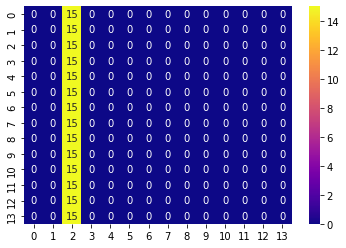

In [ ]:
sns.heatmap(cm, cmap = "plasma", annot = True)